# Machine Learning - Predicting Average Credit Card Spending per Month

This training set was provided by Sunil Jacob on Kaggle. The intent of the dataset was use a classification model to predict the likelihood of a liability customer buying personal loans.: https://www.kaggle.com/itsmesunil/bank-loan-modelling

I will use this dataset to work out what the average monthly spending on a credit card would be for a person with certain characteristics. I will use regression and features I find relevant for prediction.

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter('ignore')

## Get the data

In [2]:
# Get the data

df = pd.read_excel('Bank_Personal_loan_Modelling.xlsx', sheet_name="Data")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Explore and clean the data

In [3]:
# Drop duplicates
df = df.drop_duplicates(keep= 'first')

# Check the shape 
df.shape

(5000, 14)

In [4]:
# Find how many null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
# Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


In [6]:
# Check the stats
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
## Find how many unique values
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Because we will not need a primary key for the rest of the analysis I will drop it.

In [8]:
df = df.drop('ID', axis=1)

#### Distribution of age in this sample:

There looks as if there is a large range of ages in this dataset. I am viewing this as a positive, as I can test the sensitvity of a this feature to see if it influences the target.

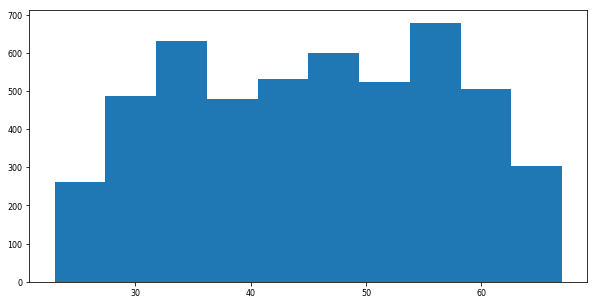

In [9]:
# Create a distribution plot for age
df['Age'].hist(figsize=(10, 5), bins=10, xlabelsize=8, ylabelsize=8, grid=False)

As expected the income histogram is positively skewed, with more people having lower salaries than higher salaries.

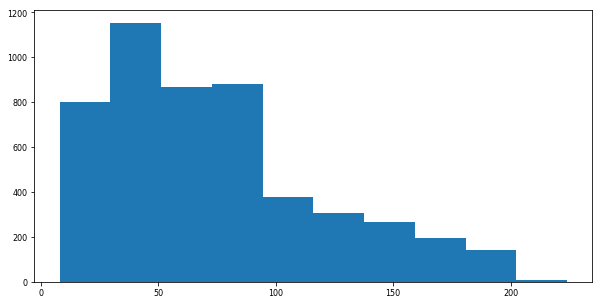

In [10]:
df['Income'].hist(figsize=(10, 5), bins=10, xlabelsize=8, ylabelsize=8, grid=False)

As salaries (above) are distributed with more people earning less than more - you would expect that mortgages have a similar shape so that people can make the repayments.

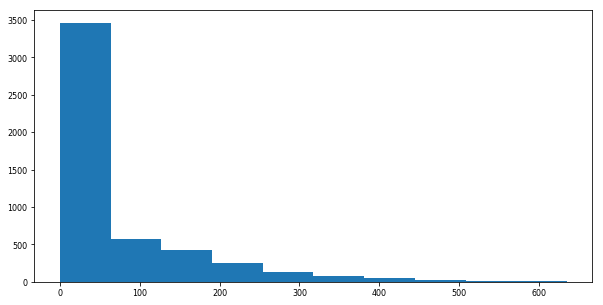

In [11]:
df['Mortgage'].hist(figsize=(10, 5), bins=10, xlabelsize=8, ylabelsize=8, grid=False)

As useful and quick method to find more trends is to do a large pairplot on the dataframe to assist with feature engineering.

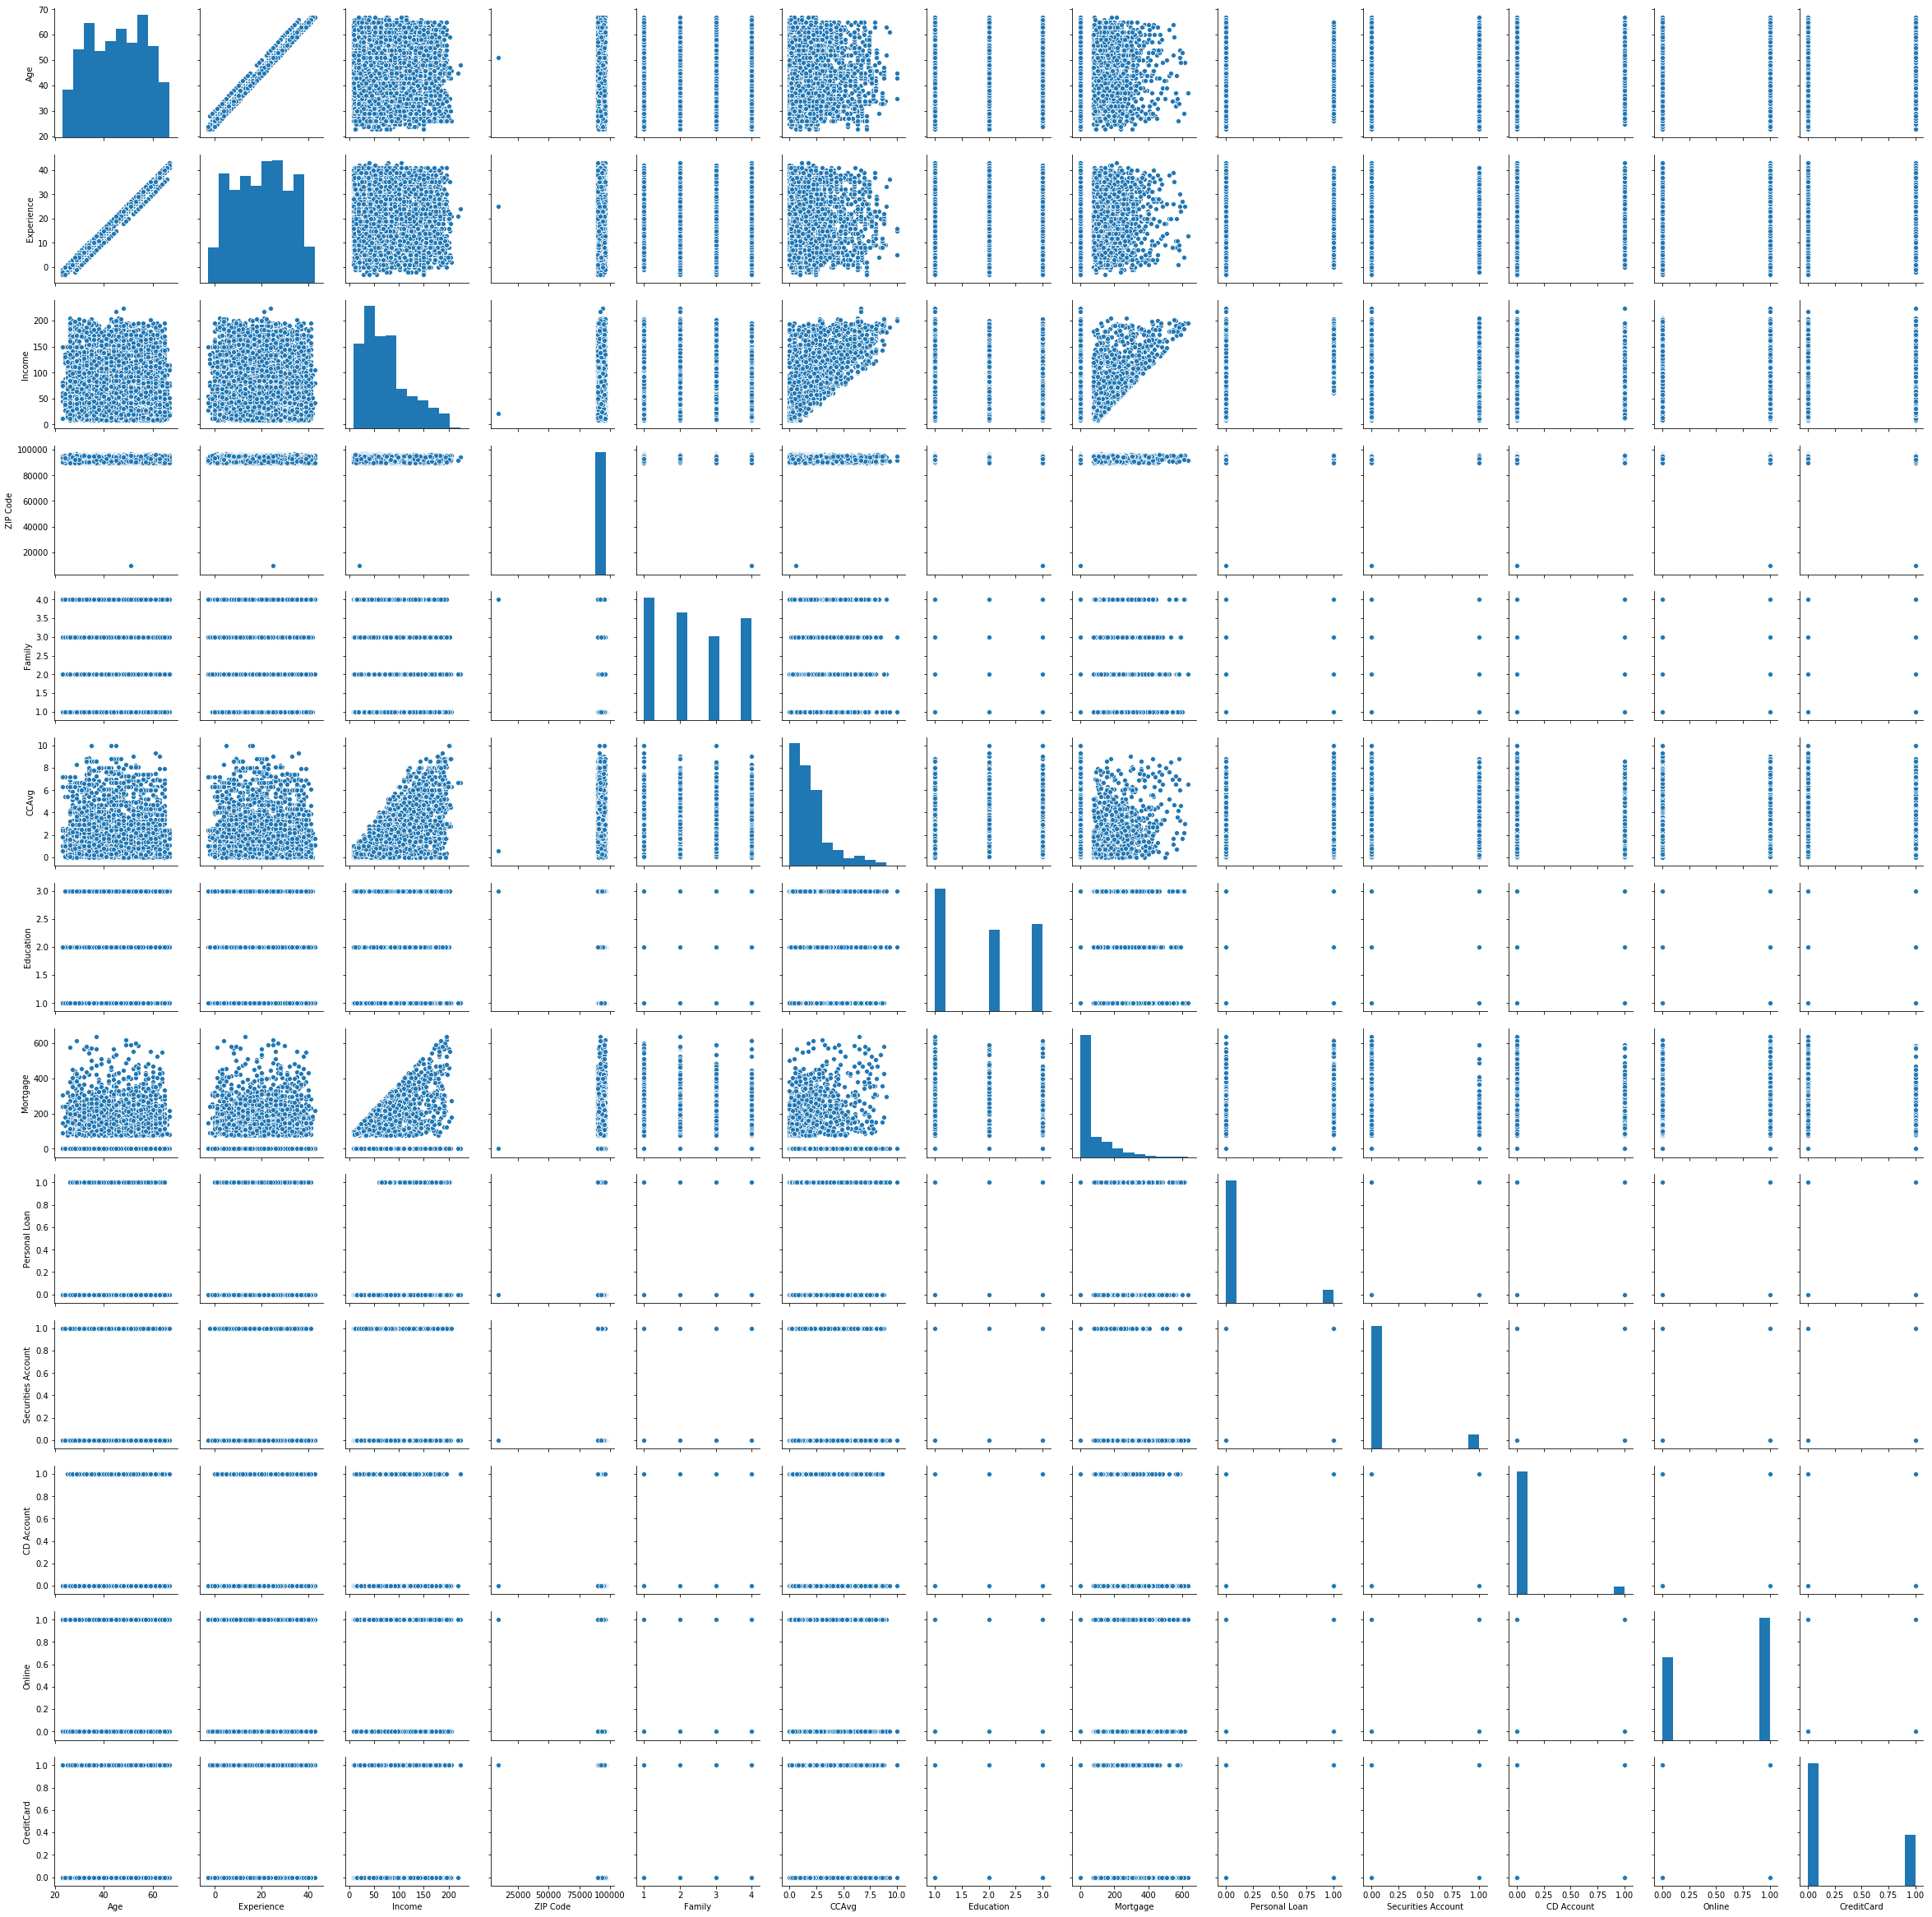

In [12]:
## Scatter plots with all numerical variables at once
sns.pairplot(df)
plt.show()

I have chosen average credit card monthly spend as the target and I want to identify which features correlate with this target

In [13]:
#Isolate the correlation between average credit card monthly spend and other features

correlation = df.drop('CCAvg', axis=1).apply(lambda x: x.corr(df.CreditCard))
print(correlation.sort_values(ascending=False))

CreditCard            1.000000
CD Account            0.278644
Family                0.011588
Experience            0.008967
ZIP Code              0.007691
Age                   0.007681
Online                0.004210
Personal Loan         0.002802
Income               -0.002385
Mortgage             -0.007231
Education            -0.011014
Securities Account   -0.015028
dtype: float64


Similar to above, I want to see how features correlate with each other to avoid multicollinearity.

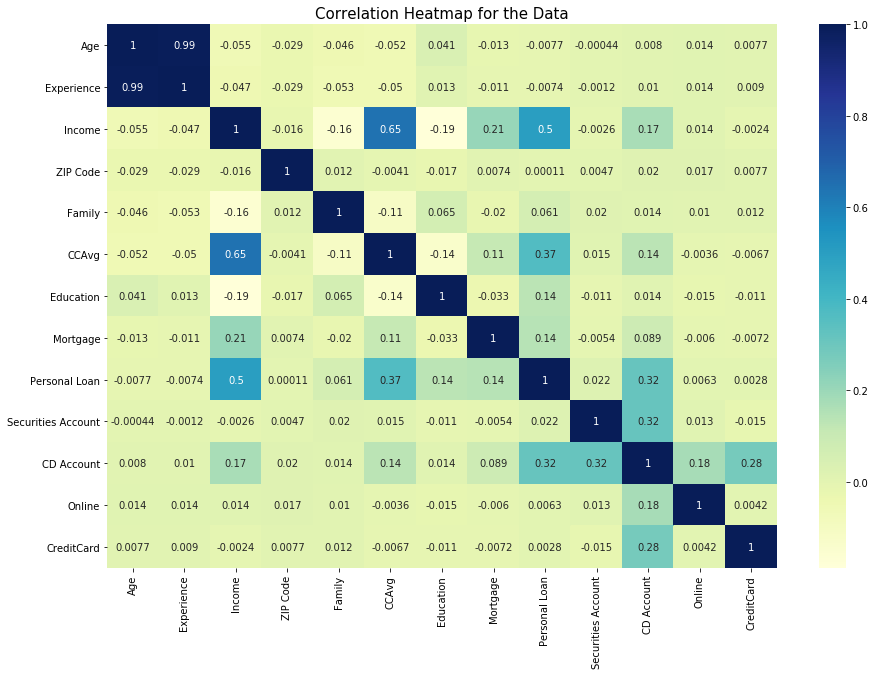

In [14]:
## Heat Map of correlations

fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True, ax=ax)
plt.title('Correlation Heatmap for the Data', fontsize = 15)
plt.show()

## Now for the machine learning...

Here I will initially use all features to train the model and review it with a feature importance method. 

I will also use multiple methods at once and rate which algorithims perform the best.

In [15]:
#Split data into training and testing

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

y_train = train['CCAvg']
y_test = test['CCAvg']

X_train = train.drop(['CCAvg'], axis=1)
X_test = test.drop(['CCAvg'], axis=1)



In [16]:
# Import machine learning modules

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
import xgboost as xgb

# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    score = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    return train_pred, score



# Random Forest Regressor ----------------------------------------------------------------

train_pred_log, acc_rfor = fit_ml_algo(RandomForestRegressor(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

# Linear Regression ---------------------------------------------------------------------

train_pred_log, acc_lin = fit_ml_algo(LinearRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)


# Decision Tree Regressor --------------------------------------------------------------------

train_pred_knn, acc_dtr = fit_ml_algo(DecisionTreeRegressor(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)


# Support Vector Regressor --------------------------------------------------------------------

train_pred_svr, acc_svr = fit_ml_algo(SVR(),
                                           X_train,
                                           y_train,
                                           10)


# XGB Regressor -------------------------------------------------------------------

train_pred_xgb, acc_xgb = fit_ml_algo(xgb.XGBRegressor(),
                                           X_train,
                                           y_train,
                                           10)


[17:43:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Income is the biggest factor in determining how much someone spends on their credit card per month.



Text(0.5, 1.0, 'Which Feature(s) are most important')

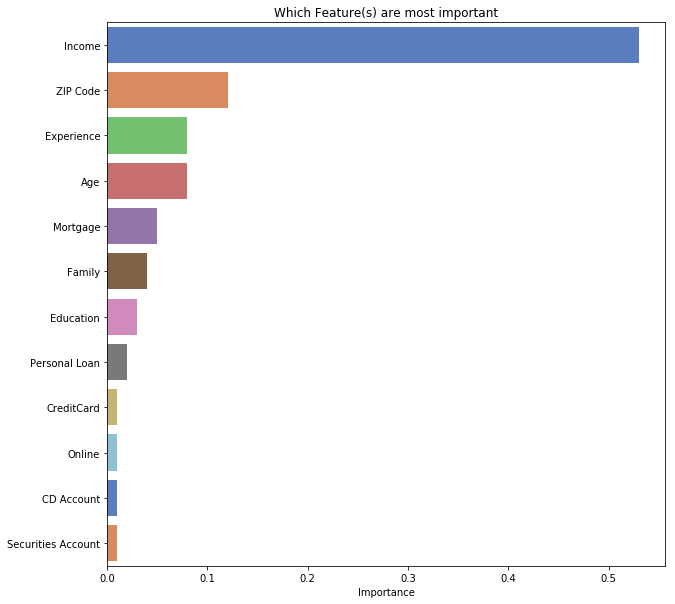

In [17]:
#Feature importance

rfr = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
rfr.fit(X_train, y_train)

f_im = rfr.feature_importances_.round(2)
rank = pd.Series(f_im, index=X_train.columns).sort_values(ascending=False)

figsize = [10.0, 10.0]

plt.figure(figsize=figsize)
sns.barplot(y=rank.index,x=rank.values,palette='muted')
plt.xlabel('Importance')
plt.title('Which Feature(s) are most important')

In [19]:
# Accuracy Scores --------------------------------------------------------------------------

models = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'LinearRegression', 'DecisionTreeRegressor', 'SVR', 'XGB' ],
    'Score': [
        acc_rfor,
        acc_lin, 
        acc_dtr, 
        acc_svr,
        acc_xgb
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
2,DecisionTreeRegressor,100.00
0,RandomForestRegressor,90.07
4,XGB,53.31
3,SVR,49.80
1,LinearRegression,42.40


As seen above, it appears that the Decision Tree Regressor algorithm appears to be over-fitting. But the Random Forrest Regresor appears to be performing well.

I will use the Random Forrest Regressor with 3 features identified from the feature importance graph above. The reason why I didn't choose 'Zip Code' is because it's currently an integer which should be turned into dummy variables, as the higher the Zip Code doesn't mean the higher the spending.

In [20]:
#Choose model

X_train = np.array(X_train[['Income', 'Experience', 'Age']])

y_train = np.array(y_train)

rfr = RandomForestRegressor()

model = rfr.fit(X_train, y_train)


# model score
print(round(model.score(X_train, y_train) * 100, 2))


86.31


Remind myself what numbers I can choose to test the ML function:

In [21]:
print("Income range is: ", df.Income.min(),"-",df.Income.max())
print("Age range is: ", df.Age.min(),"-",df.Age.max())
print("Work experience range is: ", 0,"-",df.Experience.max())

Income range is:  8 - 224
Age range is:  23 - 67
Work experience range is:  0 - 43


## Machine Learning Function

### Predicting someone's monthly credit card spending using the following features:

 - Income: The annual income of the customer ($000) 
 - Experience: The number of years of professional experience 
 - Age: How old is the Customer in completed years

In [22]:
## function to predict credit card monthly spending

def CC_Avg_Spend(Income, Experience=0, Age=18):
    
    print("Average Credit Card Spend per month $", round(float(model.predict([[Income, Experience, Age]])),2),"K")

#Predict test

CC_Avg_Spend(90, 4, 24)
print("The accuracy score is: ", round(model.score(X_train, y_train) * 100, 2),"%")

Average Credit Card Spend per month $ 1.85 K
The accuracy score is:  86.31 %
